# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

# Preparation

In [41]:
from pathlib import Path
import numpy as np

In [42]:
%load_ext autoreload
%autoreload 2

import eser_7.autocorrelate as autocorrelate
import eser_7.automation as auto
import scripts.preparation as prep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
# If you want to use a specific compiler pass as an argument to compile program:
# - g++ : "COMPILER=GNU"
# - clang++-17 with libcpp : "COMPILER=CLANG_LIBCPP"
# - clang++-17 with libstdc++ : "COMPILER=CLANG_GNUCPP"

# If you want to use intel MKL implementation of BLAS and LAPACK
# add "USE_MKL=1" as an argument

# it defaults to clang++-17 with libcpp

prep.compile_program("USE_MKL=1")

make: Entering directory '/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE'
clang++-17 -c system.cpp -o system.o -O3 --std=c++17 -pedantic -Wall -Wextra -Werror -march=native -flto -fopenmp -ffast-math -DNDEBUG -stdlib=libc++ -fexperimental-library -I"/opt/intel/oneapi/mkl/2024.2/include"
clang++-17 -O3 --std=c++17 -pedantic -Wall -Wextra -Werror -march=native -flto -fopenmp -ffast-math -DNDEBUG -stdlib=libc++ -fexperimental-library -I"/opt/intel/oneapi/mkl/2024.2/include" system.o random.o NSL_SIMULATOR.o -o simulator.exe  -DARMA_DONT_USE_WRAPPER  -L/opt/intel/oneapi/mkl/2024.2/lib -Wl,--no-as-needed -lmkl_intel_lp64 -lmkl_gnu_thread -lmkl_core -lgomp -lpthread -lm -ldl
make: Leaving directory '/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE'
Program compiled


# 7.2 Exercise

In [44]:
solid_energy_file = Path("eser_7/from_molecular_dynamics/solid/")
liquid_energy_file = Path("eser_7/from_molecular_dynamics/liquid/")
gas_energy_file = Path("eser_7/from_molecular_dynamics/gas/")

equilibration_solid_file = Path("eser_7/from_monte_carlo/solid")
equilibration_liquid_file = Path("eser_7/from_monte_carlo/liquid")
equilibration_gas_file = Path("eser_7/from_monte_carlo/gas")

measure_solid_file = Path("eser_7/measurement/solid")
measure_liquid_file = Path("eser_7/measurement/liquid")
measure_gas_file = Path("eser_7/measurement/gas")

measure_MD_solid_file = Path("eser_7/measurement_MD/solid")
measure_MD_liquid_file = Path("eser_7/measurement_MD/liquid")
measure_MD_gas_file = Path("eser_7/measurement_MD/gas")

print(Path().cwd())

/home/pilo/simNumeric


In [45]:
prep.load_config(
    prep.Phase.SOLID,
    Path("eser_7/equilibrated_config/"),
    reset_flag=True,
    is_montecarlo=True,
)

Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded


In [46]:
%%time
prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.862908

Calculated Pressure Tail Correction :-1.72073

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 12.1 ms, sys: 905 μs, total: 13 ms
Wall time: 8min 6s


In [47]:
auto.save_results_starting_equilibrated(prep.Phase.SOLID)

Copying potential_energy.dat to eser_7/from_molecular_dynamics/solid/potential_energy.dat
Copying acceptance.dat to eser_7/from_molecular_dynamics/solid/acceptance.dat
Copying gofr.dat to eser_7/from_molecular_dynamics/solid/gofr.dat
Copying partial_gofr.dat to eser_7/from_molecular_dynamics/solid/partial_gofr.dat
Results for phase solid saved


In [48]:
prep.load_config(
    prep.Phase.LIQUID,
    Path("eser_7/equilibrated_config/"),
    reset_flag=True,
    is_montecarlo=True,
)
%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))
auto.save_results_starting_equilibrated(prep.Phase.LIQUID)

Actually working on phase : LIQUID
Configuration for phase liquid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.428346

Calculated Pressure Tail Correction :-0.855522

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 13.6 ms, sys: 1.27 ms, total: 14.8 ms
Wall time: 7min 46s
Copying potential_energy.dat to eser_7/from_molecular_dynamics/liquid/potential_energy.dat
Copying acceptance.dat to eser_7/from_molecular_dynamics/liquid/acceptance.dat
Copying gofr.dat to eser_7/from_molecular_dynamics/liquid/gofr.dat
Copying partial_gofr.dat to eser_7/from_molecular_dynamics/liquid/partial

In [49]:
prep.load_config(
    prep.Phase.GAS,
    Path("eser_7/equilibrated_config/"),
    reset_flag=True,
    is_montecarlo=True,
)

Actually working on phase : GAS
Configuration for phase gas loaded
Properties loaded


In [50]:
%%time
prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.00335096

Calculated Pressure Tail Correction :-0.00670178

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 15.4 ms, sys: 1.68 ms, total: 17.1 ms
Wall time: 7min 33s


In [51]:
auto.save_results_starting_equilibrated(prep.Phase.GAS)

Copying potential_energy.dat to eser_7/from_molecular_dynamics/gas/potential_energy.dat
Copying acceptance.dat to eser_7/from_molecular_dynamics/gas/acceptance.dat
Copying gofr.dat to eser_7/from_molecular_dynamics/gas/gofr.dat
Copying partial_gofr.dat to eser_7/from_molecular_dynamics/gas/partial_gofr.dat
Results for phase gas saved


In [52]:
solid_energy = auto.load_energy_data(solid_energy_file)
solid_energy.head()
liquid_energy = auto.load_energy_data(liquid_energy_file)
liquid_energy.head()
gas_energy = auto.load_energy_data(gas_energy_file)
gas_energy.head()

,block,actual_pe,pe_ave,error
0,1,-0.462236,-0.462236,0.000000
1,2,-0.530036,-0.496136,0.023971
2,3,-0.448679,-0.480317,0.020548
3,4,-0.384252,-0.456301,0.025886
4,5,-0.388404,-0.442721,0.024008


In [53]:
base_sequence = np.array([10, 20, 25, 40, 50])
multiplier = np.array([1, 10, 100])
n_blocks = (
    base_sequence.repeat(multiplier.size).reshape(base_sequence.size, multiplier.size)
    * multiplier
).reshape(-1)


n_blocks.sort()

solid_error_arr = np.array(
    [
        autocorrelate.data_blocking(solid_energy.iloc[:, 1].to_numpy(), block).mean()
        for block in n_blocks
    ]
)
liquid_error_arr = np.array(
    [
        autocorrelate.data_blocking(liquid_energy.iloc[:, 1].to_numpy(), block).mean()
        for block in n_blocks
    ]
)
gas_error_arr = np.array(
    [
        autocorrelate.data_blocking(gas_energy.iloc[:, 1].to_numpy(), block).mean()
        for block in n_blocks
    ]
)

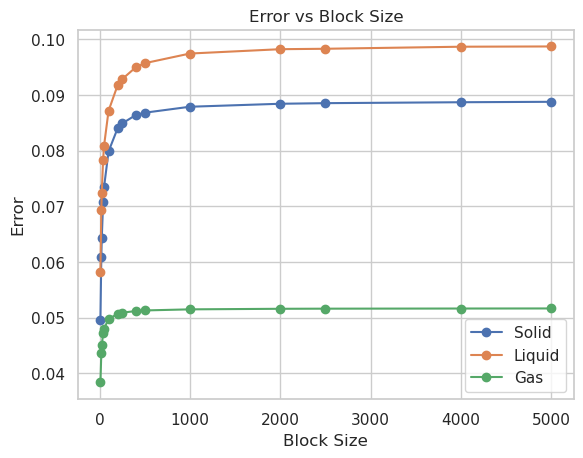

In [54]:
import matplotlib.pyplot as plt
from seaborn import set_theme

set_theme("notebook", style="whitegrid")

plt.plot(n_blocks, solid_error_arr, marker="o", label="Solid")
plt.plot(n_blocks, liquid_error_arr, marker="o", label="Liquid")
plt.plot(n_blocks, gas_error_arr, marker="o", label="Gas")
plt.ylabel("Error")
plt.xlabel("Block Size")
plt.title("Error vs Block Size")
plt.legend()

With a small block size the result is to understimate the error, tha with a greater block size reaches a Plateu and stabilizes itself, even if with three different values for each phase.

In [55]:
solid_autocorrelation: np.ndarray = autocorrelate.autocorrelation(
    solid_energy.iloc[:, 1].to_numpy()
)
liquid_autocorrelation: np.ndarray = autocorrelate.autocorrelation(
    liquid_energy.iloc[:, 1].to_numpy()
)
gas_autocorrelation: np.ndarray = autocorrelate.autocorrelation(
    gas_energy.iloc[:, 1].to_numpy()
)

solid_tau, solid_tau_error = autocorrelate.fit_exp_autocorrelation(
    solid_autocorrelation
)
gas_tau, gas_tau_error = autocorrelate.fit_exp_autocorrelation(gas_autocorrelation)
liquid_tau, liquid_tau_error = autocorrelate.fit_exp_autocorrelation(
    liquid_autocorrelation, p0=[20, 1]
)

Text(0.5, 0.98, 'Autocorrelation vs Time Step')

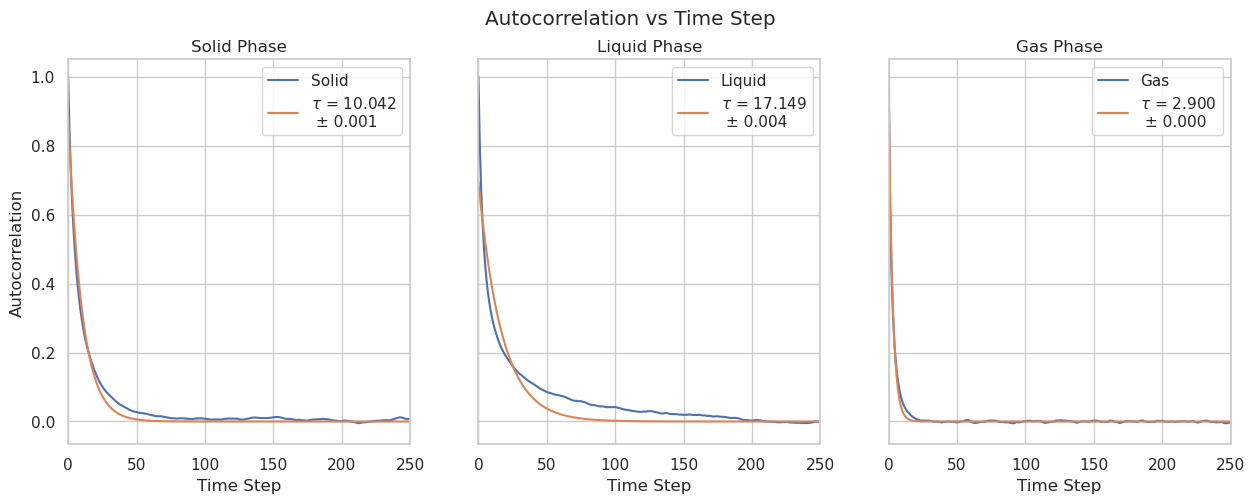

In [56]:
time_step = np.arange(solid_autocorrelation[solid_autocorrelation.size // 2 : -1].size)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True, sharex=True)

titles = ["Solid Phase", "Liquid Phase", "Gas Phase"]

axs[0].plot(
    time_step,
    solid_autocorrelation[solid_autocorrelation.size // 2 : -1],
    label="Solid",
)
axs[1].plot(
    time_step,
    liquid_autocorrelation[liquid_autocorrelation.size // 2 : -1],
    label="Liquid",
)
axs[2].plot(
    time_step, gas_autocorrelation[gas_autocorrelation.size // 2 : -1], label="Gas"
)

axs[0].plot(
    time_step,
    autocorrelate.exp_func(time_step, *solid_tau),
    label=r"$\tau$" + f" = {solid_tau[0]:.3f}\n ± {solid_tau_error[0,0]:.3f}",
)
axs[1].plot(
    time_step,
    autocorrelate.exp_func(time_step, *liquid_tau),
    label=r"$\tau$" + f" = {liquid_tau[0]:.3f}\n ± {liquid_tau_error[0,0]:.3f}",
)
axs[2].plot(
    time_step,
    autocorrelate.exp_func(time_step, *gas_tau),
    label=r"$\tau$" + f" = {gas_tau[0]:.3f}\n ± {gas_tau_error[0,0]:.3f}",
)

axs[0].set_ylabel("Autocorrelation")

for ax, title in zip(axs, titles):
    ax.set_xlabel("Time Step")
    ax.set_title(title)
    ax.legend()
    ax.set_xlim(0, 250)

fig.suptitle("Autocorrelation vs Time Step")

From the previous figure, as number of step we should use:
- Solid : around 50 steps
- Liquid : around 100 steps
- Gas : around 15 steps 

# Equilibration using Montecarlo

In [57]:
prep.load_config(
    prep.Phase.GAS, Path("eser_7/to_equilibrate_config/"), is_montecarlo=True
)

%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

auto.save_results_equilibration(prep.Phase.GAS)

Actually working on phase : GAS
Configuration for phase gas loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.00335096

Calculated Pressure Tail Correction :-0.00670178

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 3.55 ms, sys: 428 μs, total: 3.98 ms
Wall time: 1min 43s
Copying potential_energy.dat to eser_7/from_monte_carlo/gas/potential_energy.dat
Copying acceptance.dat to eser_7/from_monte_carlo/gas/acceptance.dat
Copying CONFIG/config.xyz to eser_7/from_monte_carlo/gas/CONFIG/config.xyz
Results for phase gas saved


In [58]:
prep.load_config(
    prep.Phase.LIQUID, Path("eser_7/to_equilibrate_config/"), is_montecarlo=True
)

%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

auto.save_results_equilibration(prep.Phase.LIQUID)

Actually working on phase : LIQUID
Configuration for phase liquid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.428346

Calculated Pressure Tail Correction :-0.855522

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 3.1 ms, sys: 375 μs, total: 3.48 ms
Wall time: 1min 30s
Copying potential_energy.dat to eser_7/from_monte_carlo/liquid/potential_energy.dat
Copying acceptance.dat to eser_7/from_monte_carlo/liquid/acceptance.dat
Copying CONFIG/config.xyz to eser_7/from_monte_carlo/liquid/CONFIG/config.xyz
Results for phase liquid saved


In [59]:
prep.load_config(
    prep.Phase.SOLID, Path("eser_7/to_equilibrate_config/"), is_montecarlo=True
)

%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

auto.save_results_equilibration(prep.Phase.SOLID)

Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.862908

Calculated Pressure Tail Correction :-1.72073

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 3.11 ms, sys: 375 μs, total: 3.49 ms
Wall time: 1min 30s
Copying potential_energy.dat to eser_7/from_monte_carlo/solid/potential_energy.dat
Copying acceptance.dat to eser_7/from_monte_carlo/solid/acceptance.dat
Copying CONFIG/config.xyz to eser_7/from_monte_carlo/solid/CONFIG/config.xyz
Results for phase solid saved


In [60]:
solid_equilibration = auto.load_energy_data(equilibration_solid_file)
liquid_equilibration = auto.load_energy_data(equilibration_liquid_file)
gas_equilibration = auto.load_energy_data(equilibration_gas_file)

(0.0, 5000.0)

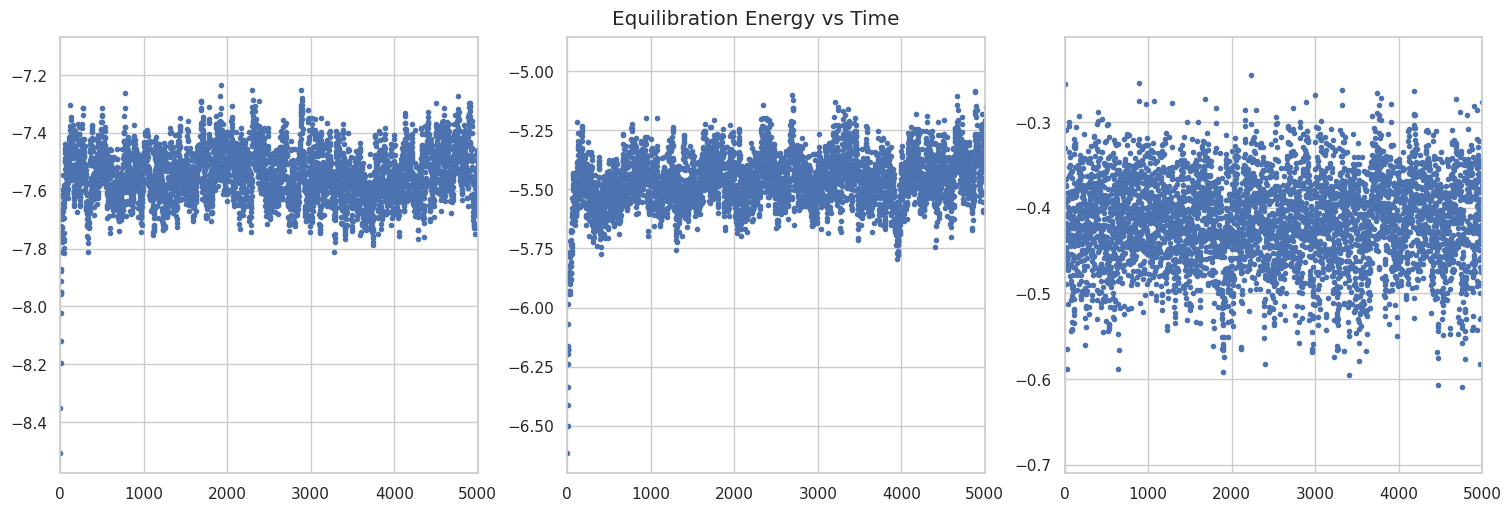

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, layout="constrained")

fig.suptitle("Equilibration Energy vs Time")

axs[0].scatter(
    solid_equilibration.iloc[:, 0],
    solid_equilibration.iloc[:, 1],
    label="Solid",
    marker=".",
)
axs[1].scatter(
    liquid_equilibration.iloc[:, 0],
    liquid_equilibration.iloc[:, 1],
    label="Liquid",
    marker=".",
)
axs[2].scatter(
    gas_equilibration.iloc[:, 0], gas_equilibration.iloc[:, 1], label="Gas", marker="."
)

axs[0].set_xlim(0, 5000)

# Final Measurement using Montecarlo, comparison with MD

In [62]:
prep.load_config(
    prep.Phase.GAS, Path("eser_7/measure_conf/"), reset_flag=True, is_montecarlo=True
)

%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

auto.save_results_production(prep.Phase.GAS)

Actually working on phase : GAS
Configuration for phase gas loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.00335096

Calculated Pressure Tail Correction :-0.00670178

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 2.6 ms, sys: 0 ns, total: 2.6 ms
Wall time: 22.9 s
Copying potential_energy.dat to eser_7/measurement/gas/potential_energy.dat
Copying acceptance.dat to eser_7/measurement/gas/acceptance.dat
Copying gofr.dat to eser_7/measurement/gas/gofr.dat
Copying partial_gofr.dat to eser_7/measurement/gas/partial_gofr.dat
Copying pressure.dat to eser_7/measurement/gas/pressure.dat

In [63]:
prep.load_config(
    prep.Phase.LIQUID, Path("eser_7/measure_conf/"), is_montecarlo=True, reset_flag=True
)

%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

auto.save_results_production(prep.Phase.LIQUID)

Actually working on phase : LIQUID
Configuration for phase liquid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.428346

Calculated Pressure Tail Correction :-0.855522

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 3.04 ms, sys: 358 μs, total: 3.39 ms
Wall time: 1min 11s
Copying potential_energy.dat to eser_7/measurement/liquid/potential_energy.dat
Copying acceptance.dat to eser_7/measurement/liquid/acceptance.dat
Copying gofr.dat to eser_7/measurement/liquid/gofr.dat
Copying partial_gofr.dat to eser_7/measurement/liquid/partial_gofr.dat
Copying pressure.dat to eser_7/measurem

In [64]:
prep.load_config(
    prep.Phase.SOLID, Path("eser_7/measure_conf/"), is_montecarlo=True, reset_flag=True
)

%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))

auto.save_results_production(prep.Phase.SOLID)

Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MONTE CARLO (NVT) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.862908

Calculated Pressure Tail Correction :-1.72073

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 2.8 ms, sys: 32 μs, total: 2.83 ms
Wall time: 53.8 s
Copying potential_energy.dat to eser_7/measurement/solid/potential_energy.dat
Copying acceptance.dat to eser_7/measurement/solid/acceptance.dat
Copying gofr.dat to eser_7/measurement/solid/gofr.dat
Copying partial_gofr.dat to eser_7/measurement/solid/partial_gofr.dat
Copying pressure.dat to eser_7/measurement/solid/p

In [65]:
prep.load_config(prep.Phase.SOLID, Path("eser_7/measure_conf_MD/"), reset_flag=True)
%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))
auto.save_results_production_MD(prep.Phase.SOLID)

prep.load_config(prep.Phase.LIQUID, Path("eser_7/measure_conf_MD/"), reset_flag=True)
%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))
auto.save_results_production_MD(prep.Phase.LIQUID)

prep.load_config(prep.Phase.GAS, Path("eser_7/measure_conf_MD/"), reset_flag=True)
%time prep.run_program(Path("NSL_SIMULATOR/SOURCE/"))
auto.save_results_production_MD(prep.Phase.GAS)

Actually working on phase : SOLID
Configuration for phase solid loaded
Properties loaded
/home/pilo/simNumeric/NSL_SIMULATOR/SOURCE
['./simulator.exe']
Random number generator initialized

Starting Parsing of input.dat

LJ MOLECULAR DYNAMICS (NVE) SIMULATION

Reading input completed!

Starting Velocity Initialization

Velocity correctly initialized

Ended Parsing System Properties

System initialized

Starting Parsing Properties

Calculated Potential Energy Tail Correction :-0.862908

Calculated Pressure Tail Correction :-1.72073

Properties Correctly Initialized

Properties initialized

ENDING

Program executed
CPU times: user 2.63 ms, sys: 310 μs, total: 2.94 ms
Wall time: 1min 11s
Copying potential_energy.dat to eser_7/measurement_MD/solid/potential_energy.dat
Copying acceptance.dat to eser_7/measurement_MD/solid/acceptance.dat
Copying gofr.dat to eser_7/measurement_MD/solid/gofr.dat
Copying partial_gofr.dat to eser_7/measurement_MD/solid/partial_gofr.dat
Copying pressure.dat to ese

In [66]:
measure_energy_solid = auto.load_energy_data(measure_solid_file)
measure_energy_liquid = auto.load_energy_data(measure_liquid_file)
measure_energy_gas = auto.load_energy_data(measure_gas_file)

measure_pressure_solid = auto.load_pressure_data(measure_solid_file)
measure_pressure_liquid = auto.load_pressure_data(measure_liquid_file)
measure_pressure_gas = auto.load_pressure_data(measure_gas_file)

measure_gofr_solid = auto.load_gofr_data(measure_solid_file)
measure_gofr_liquid = auto.load_gofr_data(measure_liquid_file)
measure_gofr_gas = auto.load_gofr_data(measure_gas_file)

measure_MD_energy_solid = auto.load_energy_data(measure_MD_solid_file)
measure_MD_energy_liquid = auto.load_energy_data(measure_MD_liquid_file)
measure_MD_energy_gas = auto.load_energy_data(measure_MD_gas_file)

measure_MD_pressure_solid = auto.load_pressure_data(measure_MD_solid_file)
measure_MD_pressure_liquid = auto.load_pressure_data(measure_MD_liquid_file)
measure_MD_pressure_gas = auto.load_pressure_data(measure_MD_gas_file)

measure_MD_gofr_solid = auto.load_gofr_data(measure_MD_solid_file)
measure_MD_gofr_liquid = auto.load_gofr_data(measure_MD_liquid_file)
measure_MD_gofr_gas = auto.load_gofr_data(measure_MD_gas_file)

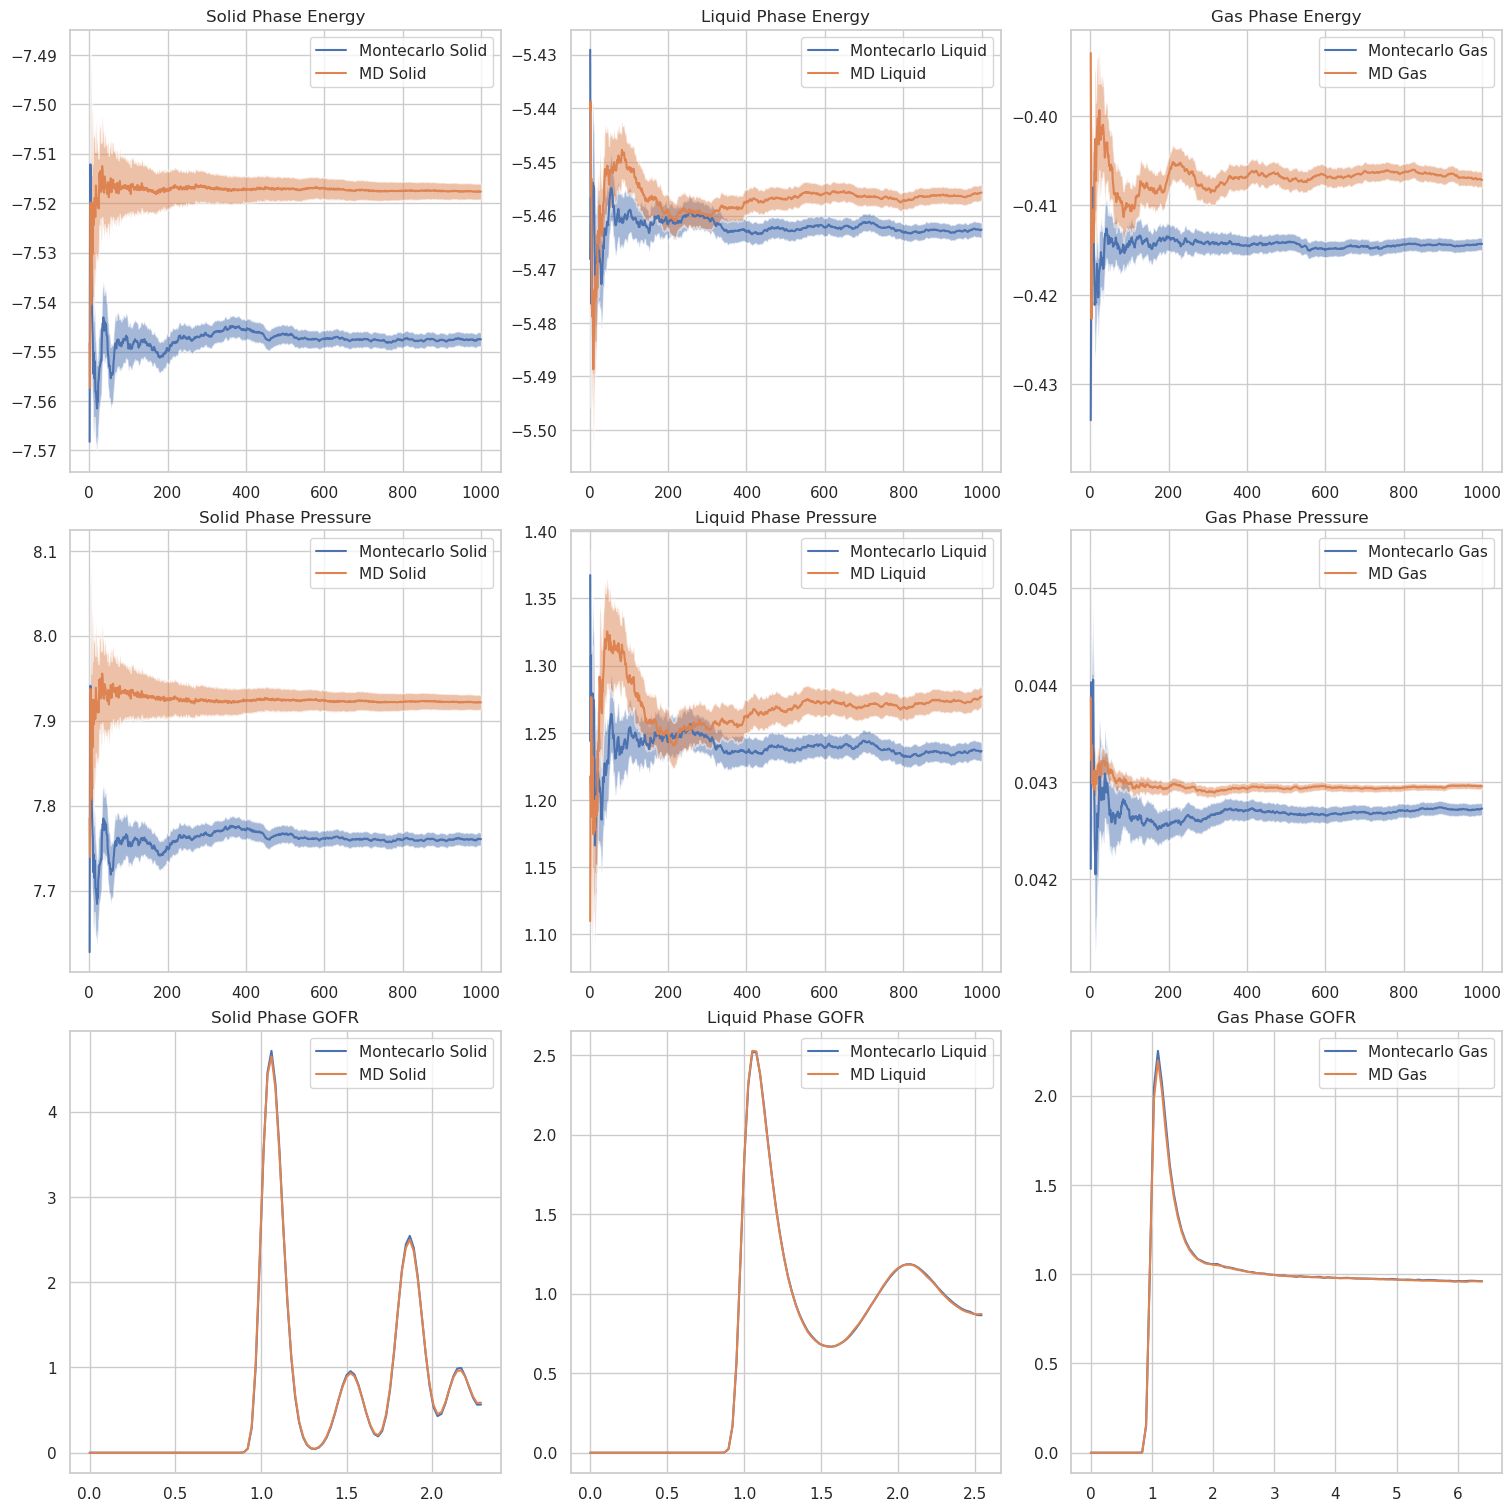

In [67]:
from matplotlib.axes import Axes
import pandas as pd

fig, axs = plt.subplots(3, 3, figsize=(15, 15), layout="constrained")

config_potential = {"x": "block", "y": "pe_ave", "yerr": "error"}
config_pressure = {"x": "block", "y": "p_ave", "yerr": "error"}
config_gofr = {"x": "distance", "y": "average", "yerr": "error"}


def custom_errorbar(
    ax: Axes,
    data: pd.DataFrame,
    x: str,
    y: str,
    yerr: str,
    label: str = None,
    title: str = None,
):
    ax.plot(
        x,
        y,
        data=data,
        label=label,
    )
    ax.fill_between(
        x=data[x],
        y1=data[y] - data[yerr],
        y2=data[y] + data[yerr],
        alpha=0.5,
    )
    if title:
        ax.set_title(title)


# Energy
custom_errorbar(
    axs[0, 0],
    measure_energy_solid,
    label="Montecarlo Solid",
    title="Solid Phase Energy",
    **config_potential,
)
custom_errorbar(
    axs[0, 1],
    measure_energy_liquid,
    label="Montecarlo Liquid",
    title="Liquid Phase Energy",
    **config_potential,
)
custom_errorbar(
    axs[0, 2],
    measure_energy_gas,
    label="Montecarlo Gas",
    title="Gas Phase Energy",
    **config_potential,
)
custom_errorbar(
    axs[0, 0],
    measure_MD_energy_solid,
    label="MD Solid",
    **config_potential,
)
custom_errorbar(
    axs[0, 1],
    measure_MD_energy_liquid,
    label="MD Liquid",
    **config_potential,
)
custom_errorbar(
    axs[0, 2],
    measure_MD_energy_gas,
    label="MD Gas",
    **config_potential,
)

# Pressure
custom_errorbar(
    axs[1, 0],
    measure_pressure_solid,
    label="Montecarlo Solid",
    title="Solid Phase Pressure",
    **config_pressure,
)
custom_errorbar(
    axs[1, 1],
    measure_pressure_liquid,
    label="Montecarlo Liquid",
    title="Liquid Phase Pressure",
    **config_pressure,
)
custom_errorbar(
    axs[1, 2],
    measure_pressure_gas,
    label="Montecarlo Gas",
    title="Gas Phase Pressure",
    **config_pressure,
)
custom_errorbar(
    axs[1, 0],
    measure_MD_pressure_solid,
    label="MD Solid",
    **config_pressure,
)
custom_errorbar(
    axs[1, 1],
    measure_MD_pressure_liquid,
    label="MD Liquid",
    **config_pressure,
)
custom_errorbar(
    axs[1, 2],
    measure_MD_pressure_gas,
    label="MD Gas",
    **config_pressure,
)

# Gofr
custom_errorbar(
    axs[2, 0],
    measure_gofr_solid,
    label="Montecarlo Solid",
    title="Solid Phase GOFR",
    **config_gofr,
)
custom_errorbar(
    axs[2, 1],
    measure_gofr_liquid,
    label="Montecarlo Liquid",
    title="Liquid Phase GOFR",
    **config_gofr,
)
custom_errorbar(
    axs[2, 2],
    measure_gofr_gas,
    label="Montecarlo Gas",
    title="Gas Phase GOFR",
    **config_gofr,
)

custom_errorbar(
    axs[2, 0],
    measure_MD_gofr_solid,
    label="MD Solid",
    **config_gofr,
)
custom_errorbar(
    axs[2, 1],
    measure_MD_gofr_liquid,
    label="MD Liquid",
    **config_gofr,
)
custom_errorbar(
    axs[2, 2],
    measure_MD_gofr_gas,
    label="MD Gas",
    **config_gofr,
)


for ax in axs.flatten():
    ax.legend()

Molecular Dynamics and Montecarlo produce in my simulations incompatible results in terms of errorbars.

Even thought they are incompatible, they are quite close in terms of numerical results, and they predict correctly the physical state of the system, as it can be shown from $g(r)$.

The gas phase is an exception because the solutions proposed are compatible with each other, this is probably related to the higher degree of freedom of the system.